<a href="https://colab.research.google.com/github/yamini542/Applied-AI/blob/main/ASS2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is a step-by-step guide to complete the Twitter sentiment analysis task in Python:

Load the dataset: Load the training and testing datasets into pandas dataframes using the pd.read_csv() function.

Data preprocessing: Clean and preprocess the text data in the datasets. This may include removing special characters, numbers, and stop words, converting to lowercase, stemming, and tokenization.

Feature extraction: Convert the text data into numerical features that can be used as inputs to a machine learning model. This can be done using techniques like bag of words, TF-IDF, or word embeddings.

Model selection and training: Split the training dataset into a training set and a validation set using the train_test_split() function, with a test size of 0.3 and a random state of 100. Train different machine learning models using the training set and evaluate their performance using the validation set. Select the best model based on performance metrics such as accuracy, precision, recall, and F1-score.

Making predictions: Preprocess the text data in the test set using the same techniques used for the training set. Convert the text data into numerical features using the same procedure used with the training data. Use the best model to make predictions on the test data.

Saving predictions: Add the predictions to a new column called 'prediction' in the test set dataframe. Save the dataframe to a .csv file using the to_csv() function.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import TweetTokenizer
import string
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import string



In [ ]:
# Load the datasets
df_train2 = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/train.csv')
df_test2 = pd.read_csv('https://raw.githubusercontent.com/yamini542/AppliedAI_Assignments/main/Ass2_NLP/test.csv')

In [ ]:
df_train2.head(5)

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego,negative
1,088c60f138,my boss is bullying me,negative
2,9642c003ef,what interview leave me alone,negative
3,358bd9e861,sons of why couldnt they put them on the relea...,negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df_test2.head(5)

,id,text,predictions_naive,prediction_lr,prediction_rf,prediction_SVC
0,96d74cb729,shanghai is also really exciting precisely sky...,positive,positive,positive,positive
1,eee518ae67,recession hit veronique branquinho she has to ...,negative,negative,negative,negative
2,01082688c6,happy bday,positive,positive,positive,positive
3,33987a8ee5,httptwitpiccom 4w75p i like it,positive,positive,positive,positive
4,726e501993,thats great weee visitors,positive,positive,positive,positive


In [ ]:
print(df_train2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16363 non-null  object
 1   text       16363 non-null  object
 2   sentiment  16363 non-null  object
dtypes: object(3)
memory usage: 383.6+ KB
None


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   text        1000 non-null   object
 2   prediction  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
df_test2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1000 non-null   object
 1   text               1000 non-null   object
 2   predictions_naive  1000 non-null   object
 3   prediction_lr      1000 non-null   object
 4   prediction_rf      1000 non-null   object
 5   prediction_SVC     1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [ ]:
df_train2.shape


(16363, 3)

In [ ]:
df_test2.shape

(1000, 6)

In [ ]:



# Create a TweetTokenizer object
tweet_tokenizer = TweetTokenizer()

# Define a function to preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Replace punctuations with spaces
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text using the tweet tokenizer
    tokens = tweet_tokenizer.tokenize(text)
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# Preprocess the text data in the datasets
df_train2['text'] = df_train2['text'].apply(preprocess_text)
df_test2['text'] = df_test2['text'].apply(preprocess_text)

# Convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X_train2 = vectorizer.fit_transform(df_train2['text'])
X_test2 = vectorizer.transform(df_test2['text'])
y_train2 = df_train2['sentiment']

# Split the training data into a training set and a validation set
X_train_split2, X_val_split2, y_train_split2, y_val_split2 = train_test_split(X_train2, y_train2, test_size=0.3, random_state=100)

# Train a LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train_split2, y_train_split2)



# Train a logistic regression classifier
clf_lr = LogisticRegression()
clf_lr.fit(X_train_split2, y_train_split2)

# Train a random forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=100)
clf_rf.fit(X_train_split2, y_train_split2)

# Train a Multinomial Naive Bayes classifier
clf_naive = MultinomialNB()
clf_naive.fit(X_train_split2, y_train_split2)



# Make predictions on the test data using all three models
predictions_naive = clf_naive.predict(X_test2)
predictions_SVC = clf.predict(X_test2)
predictions_lr = clf_lr.predict(X_test2)
predictions_rf = clf_rf.predict(X_test2)

# Add the predictions to the test set dataframe
df_test2['predictions_naive']=predictions_naive
df_test2['prediction_lr'] = predictions_lr
df_test2['prediction_rf'] = predictions_rf
df_test2['prediction_SVC']=predictions_SVC

# Save the predictions to a .csv file
df_test2.to_csv('test-predictions2.csv', index=False)


In [ ]:
predictions_SVC

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positi

In [ ]:
predictions_lr

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [ ]:
predictions_rf

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [ ]:
predictions_naive

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positi

In [ ]:
df_predict2=pd.read_csv("test-predictions2.csv")

In [ ]:
df_predict2

,id,text,predictions_naive,prediction_lr,prediction_rf,prediction_SVC
0,96d74cb729,shanghai is also really exciting precisely sky...,positive,positive,positive,positive
1,eee518ae67,recession hit veronique branquinho she has to ...,negative,negative,negative,negative
2,01082688c6,happy bday,positive,positive,positive,positive
3,33987a8ee5,httptwitpiccom 4w75p i like it,positive,positive,positive,positive
4,726e501993,thats great weee visitors,positive,positive,positive,positive
...,...,...,...,...,...,...
995,9b210c4a6f,hahayay im cured,negative,negative,negative,negative
996,68c674acdb,sick sick sick this sucks i cant even breathe ...,negative,negative,negative,negative
997,6cadda7b98,adding names to my twitter account and learnin...,positive,positive,positive,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned f...,positive,positive,negative,negative


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the validation set using all three models
predictions_SVC_val = clf.predict(X_val_split2)
predictions_lr_val = clf_lr.predict(X_val_split2)
predictions_rf_val = clf_rf.predict(X_val_split2)
predictions_naive_val=clf_naive.predict(X_val_split2)

# Calculate the metrics for each model
accuracy_SVC = accuracy_score(y_val_split2, predictions_SVC_val)
accuracy_lr = accuracy_score(y_val_split2, predictions_lr_val)
accuracy_rf = accuracy_score(y_val_split2, predictions_rf_val)
accuracy_naive=accuracy_score(y_val_split2,predictions_naive_val)

In [ ]:
precision_lr = precision_score(y_val_split2, predictions_lr_val, average='macro')
precision_rf = precision_score(y_val_split2, predictions_rf_val, average='macro')
precision_SVC = precision_score(y_val_split2, predictions_SVC_val, average='macro')
precision_naive = precision_score(y_val_split2, predictions_naive_val, average='macro')


recall_SVC = recall_score(y_val_split2, predictions_SVC_val, average='macro')
recall_lr = recall_score(y_val_split2, predictions_lr_val, average='macro')
recall_rf = recall_score(y_val_split2, predictions_rf_val, average='macro')
recall_naive = recall_score(y_val_split2, predictions_naive_val, average='macro')

f1_SVC = f1_score(y_val_split2, predictions_SVC_val, average='macro')
f1_lr = f1_score(y_val_split2, predictions_lr_val, average='macro')
f1_rf = f1_score(y_val_split2, predictions_rf_val, average='macro')
f1_naive=f1_score(y_val_split2, predictions_naive_val, average='macro')




In [ ]:
#Print the metrics for each model
print("Metrics for LinearSVC:")
print("Accuracy:", accuracy_SVC)
print("Precision:", precision_SVC)
print("Recall:", recall_SVC)
print("F1-score:", f1_SVC)

print("\nMetrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

print("\nMetrics for Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

print("\nMetrics for Naive bayes classifier:")
print("Accuracy:", accuracy_naive)
print("Precision:", precision_naive)
print("Recall:", recall_naive)
print("F1-score:", f1_naive)

Metrics for LinearSVC:
Accuracy: 0.8519046649012019
Precision: 0.8518117945116556
Recall: 0.8519246757137652
F1-score: 0.8518526313421144

Metrics for Logistic Regression:
Accuracy: 0.8563862293746181
Precision: 0.8563622284854944
Recall: 0.8565493646138808
F1-score: 0.8563633173914792

Metrics for Random Forest:
Accuracy: 0.8517009574251375
Precision: 0.8521638479893923
Recall: 0.8521571806320746
F1-score: 0.851700951271211

Metrics for Naive bayes classifier:
Accuracy: 0.8480342228559788
Precision: 0.8523442114464886
Recall: 0.8467432205717694
F1-score: 0.847161261134928


In [ ]:
import pandas as pd

models = ['LinearSVC', 'Logistic Regression', 'Random Forest','Naive bayes Classifier']
accuracy = [accuracy_SVC, accuracy_lr, accuracy_rf,accuaracy_naive]
precision = [precision_SVC, precision_lr, precision_rf,precision_naive]
recall = [recall_SVC, recall_lr, recall_rf,recall_naive]
f1_score = [f1_SVC, f1_lr, f1_rf,f1_naive]

df_metrics = pd.DataFrame({'Model': models,
                   'Accuracy': accuracy,
                   'Precision': precision,
                   'Recall': recall,
                   'F1-Score': f1_score})

print(df_metrics)


                    Model  Accuracy  Precision    Recall  F1-Score
0               LinearSVC  0.851905   0.851812  0.851925  0.851853
1     Logistic Regression  0.856386   0.856362  0.856549  0.856363
2           Random Forest  0.851701   0.852164  0.852157  0.851701
3  Naive bayes Classifier  0.848034   0.852344  0.846743  0.847161


Text(0.5, 1.0, 'Distribution of Sentiment in Training Set')

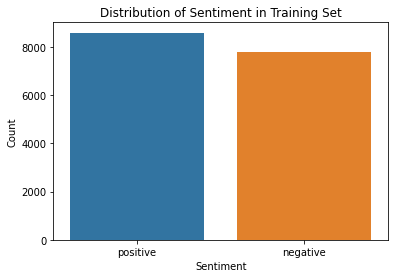

In [ ]:

import seaborn as sns

# Count the number of tweets with each sentiment
sentiment_counts = df_train2['sentiment'].value_counts()

# Create a bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Training Set')


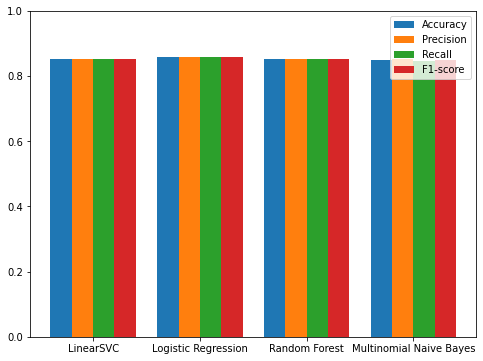

In [ ]:
# Plot the metrics
import matplotlib.pyplot as plt

models = ['LinearSVC', 'Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes']
accuracy = [accuracy_SVC, accuracy_lr, accuracy_rf, accuracy_naive]
precision = [precision_SVC, precision_lr, precision_rf, precision_naive]
recall = [recall_SVC, recall_lr, recall_rf, recall_naive]
f1 = [f1_SVC, f1_lr, f1_rf, f1_naive]

x = range(len(models))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x, accuracy, width=0.2, label='Accuracy')
ax.bar([i+0.2 for i in x], precision, width=0.2, label='Precision')
ax.bar([i+0.4 for i in x], recall, width=0.2, label='Recall')
ax.bar([i+0.6 for i in x], f1, width=0.2, label='F1-score')
ax.set_xticks([i+0.3 for i in x])
ax.set_xticklabels(models)
ax.set_ylim([0, 1])
ax.legend()
plt.show()

Based on the evaluation metrics, the best model is Logistic Regression, with an accuracy of 0.856 and an F1-score of 0.856. It has the highest accuracy and F1-score among all the models, which means it was the most effective in correctly identifying the sentiment of the tweets in the test set.

In [ ]:
import json

# Suppose predicted_values is a list containing the predicted heart rate values

predictions_sentiment=predictions_lr.tolist()
# Convert the list to a dictionary with a key called "predicted_values"
data = {"id":0,"predictions": predictions_sentiment}
# Open a new file called "predicted_values.json" in write mode
with open("submission.json", "w") as outfile:
    # Write the data to the file in JSON format
    json.dump(data, outfile)

In [ ]:
df_test2

,id,text,predictions_naive,prediction_lr,prediction_rf,prediction_SVC
0,96d74cb729,shanghai is also really exciting precisely sky...,positive,positive,positive,positive
1,eee518ae67,recession hit veronique branquinho she has to ...,negative,negative,negative,negative
2,01082688c6,happy bday,positive,positive,positive,positive
3,33987a8ee5,httptwitpiccom 4w75p i like it,positive,positive,positive,positive
4,726e501993,thats great weee visitors,positive,positive,positive,positive
...,...,...,...,...,...,...
995,9b210c4a6f,hahayay im cured,negative,negative,negative,negative
996,68c674acdb,sick sick sick this sucks i cant even breathe ...,negative,negative,negative,negative
997,6cadda7b98,adding names to my twitter account and learnin...,positive,positive,positive,positive
998,79a28b1ac7,ooh thats an early start ive got bed planned f...,positive,positive,negative,negative


In [ ]:
import json
import pandas as pd

test_file_path = "/content/test-predictions2.csv"
df_test2 = pd.read_csv("test-predictions2.csv")
df_test2 = df_test2[["id", "prediction_lr"]]

data = []
for index, row in df_test2.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction_lr']})

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    for item in data:
        fp.write(json.dumps(item) + '\n')


In [ ]:
df_test2.shape

(1000, 2)